<a href="https://colab.research.google.com/github/arobiddin/DS_LS/blob/main/04_VISUAL_AMALIYOT_01_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 4-MODUL. VIZUALIZASIYA

## 1-AMALIYOT. `matplotlib`


In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Ushbu amaliyot uchun https://en.tutiempo.net/climate/ws-384570.html sahifasidagi Toshkent shahri o'rtacha havo harorati haqidagi ma'lumotlardan foydalanamiz.

![](https://i.imgur.com/lCIRIYm.png)

In [2]:
#@title QUYIDAGI KODGA TEGMANG!!!
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

## 1-VAZIFA: Sahifadagi jadvalni pandas dataframega aylantiring va:
### - Yil (`Year`) ustunini index sifatida o'qing.
### - 1990 yildan avvalgi ma'lumotlar tashlab yuboring.
### - natijani `df` degan o'zgaruvchiga saqlang

In [51]:
# JAVOBNI SHUYERGA YOZING
url = "https://en.tutiempo.net/climate/ws-384570.html"
tables = pd.read_html(url)
df = pd.DataFrame(data=tables[3])
df.index = df.Year
df = df.drop(columns = 'Year')
df = df.loc[1990:]
df.head()

,T,TM,Tm,PP,V,RA,SN,TS,FG,TN,GR
Year,,,,,,,,,,,
1990,14.9,21.5,8.7,504.72,5.1,84,32,12,12,0,1
1991,14.4,21.2,8.3,460.52,5.1,77,26,15,17,0,1
1992,14.4,20.8,8.6,470.39,5.1,93,19,9,2,0,1
1993,13.4,19.6,7.6,710.97,5.4,98,38,12,10,1,0
1994,14.4,21.1,8.0,595.38,5.1,66,28,4,9,0,0


In [ ]:
#@title Kutilgan natija:

,T,TM,Tm,PP,V,RA,SN,TS,FG,TN,GR
Year,,,,,,,,,,,
1991,14.4,21.2,8.3,460.52,5.1,77,26,15,17,0,1
1992,14.4,20.8,8.6,470.39,5.1,93,19,9,2,0,1
1993,13.4,19.6,7.6,710.97,5.4,98,38,12,10,1,0
1994,14.4,21.1,8.0,595.38,5.1,66,28,4,9,0,0
1995,15.0,22.2,8.4,189.99,4.4,41,20,8,12,0,0


In [73]:
#@title To'g'ri javob
tables = pd.read_html("https://en.tutiempo.net/climate/ws-384570.html", index_col=0)
# read_html sahifadagi har bir jadvallarni bitta ro'yxatga joylaydi,
# ro'yxatni tahlil qilib bizga kerak jadval [3] indeksda joylashganini bilsak bo'ladi
df = tables[3][tables[3].index>1990]
# df.head()

## 2-VAZIFA. Har bir ustun nimani anglatishi ham yuqoridagi sahifada joylashgan. Shu jadvalni ham chiqaring. Matnlarni [Google translate](https://translate.google.com) orqali tarjima qilib, uqib oling.

In [74]:
# JAVOBNI SHUYERGA YOZING
tables[4]

,1
0,
T,Average annual temperature
TM,Annual average maximum temperature
Tm,Average annual minimum temperature
PP,Rain or snow precipitation total annual
V,Annual average wind speed
RA,Number of days with rain
SN,Number of days with snow
TS,Number of days with storm
FG,Number of foggy days


In [ ]:
#@title Kutilgan natija:


,1
0,
T,Average annual temperature
TM,Annual average maximum temperature
Tm,Average annual minimum temperature
PP,Rain or snow precipitation total annual
V,Annual average wind speed
RA,Number of days with rain
SN,Number of days with snow
TS,Number of days with storm
FG,Number of foggy days


In [ ]:
#@title To'g'ri javob:
# tables[4]

## 3-VAZIFA. `df`ni tahlil qilamiz

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 1990 to 2023
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   T       34 non-null     object
 1   TM      34 non-null     object
 2   Tm      34 non-null     object
 3   PP      34 non-null     object
 4   V       34 non-null     object
 5   RA      34 non-null     object
 6   SN      34 non-null     object
 7   TS      34 non-null     object
 8   FG      34 non-null     object
 9   TN      34 non-null     object
 10  GR      34 non-null     object
dtypes: object(11)
memory usage: 3.2+ KB


### **SAVOL**: Yuqoridagi natijadan qanday xulosaga kelish mumkin? DF dagi sonlar bilan ishlasak bo'ladimi?

In [ ]:
#@title JAVOB:
# Afsuski, jadvalda mavjud bo'lmagan qiymatlar o'rniga tire (-) belgisi qo'yib ketilgan,
# shu sababdan jadval ustunlari son (int, float) emas matn (object) bo'lib qolgan.

## 4-VAZIFA. `df`dagi barcha `-` belgilarni `NaN` qiymat bilan almashtiring.

In [75]:
# JAVOBNI SHUYERGA YOZING
df.replace({"-":None},inplace = True)
df.isnull().sum()

<ipython-input-75-a4b7e9020204>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace({"-":None},inplace = True)


T      5
TM     5
Tm     5
PP    24
V      5
RA     4
SN     4
TS     4
FG     4
TN     4
GR     4
dtype: int64

In [ ]:
#@title To'g'ri javob
df = df.replace("-", np.nan)

## 5-VAZIFA. `df` ustunlari qiymatlarini matndan o'nlik songa (`float`) o'zgartiring.

In [83]:
# JAVOBNI SHUYERGA YOZING
df = df.astype(float)
df

,T,TM,Tm,PP,V,RA,SN,TS,FG,TN,GR
Year,,,,,,,,,,,
1991,14.4,21.2,8.3,460.52,5.1,77.0,26.0,15.0,17.0,0.0,1.0
1992,14.4,20.8,8.6,470.39,5.1,93.0,19.0,9.0,2.0,0.0,1.0
1993,13.4,19.6,7.6,710.97,5.4,98.0,38.0,12.0,10.0,1.0,0.0
1994,14.4,21.1,8.0,595.38,5.1,66.0,28.0,4.0,9.0,0.0,0.0
1995,15.0,22.2,8.4,189.99,4.4,41.0,20.0,8.0,12.0,0.0,0.0
1996,14.0,20.5,7.6,184.16,5.0,68.0,23.0,14.0,13.0,0.0,0.0
1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999,15.7,22.4,8.9,524.21,7.6,98.0,15.0,13.0,18.0,0.0,0.0


In [ ]:
#@title To'g'ri javob:
df = df.astype(dtype='float')
df.head(10)

,T,TM,Tm,PP,V,RA,SN,TS,FG,TN,GR
Year,,,,,,,,,,,
1991,14.4,21.2,8.3,460.52,5.1,77.0,26.0,15.0,17.0,0.0,1.0
1992,14.4,20.8,8.6,470.39,5.1,93.0,19.0,9.0,2.0,0.0,1.0
1993,13.4,19.6,7.6,710.97,5.4,98.0,38.0,12.0,10.0,1.0,0.0
1994,14.4,21.1,8.0,595.38,5.1,66.0,28.0,4.0,9.0,0.0,0.0
1995,15.0,22.2,8.4,189.99,4.4,41.0,20.0,8.0,12.0,0.0,0.0
1996,14.0,20.5,7.6,184.16,5.0,68.0,23.0,14.0,13.0,0.0,0.0
1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999,15.7,22.4,8.9,524.21,7.6,98.0,15.0,13.0,18.0,0.0,0.0


## 6-VAZIFA. `NaN` qiymatlar bilan ishlaymiz
### 6.1. Har bir ustundagi `NaN` qiymatlar soni va ularning proprosiyasini toping.

In [85]:
# JAVOBNI SHUYERGA YOZING
df.isnull().sum()/len(df)*100

T     15.151515
TM    15.151515
Tm    15.151515
PP    72.727273
V     15.151515
RA    12.121212
SN    12.121212
TS    12.121212
FG    12.121212
TN    12.121212
GR    12.121212
dtype: float64

In [ ]:
#@title Kutilgan natija
df.isnull().sum()/len(df)*100

T     16.129032
TM    16.129032
Tm    16.129032
PP    70.967742
V     16.129032
RA    12.903226
SN    12.903226
TS    12.903226
FG    12.903226
TN    12.903226
GR    12.903226
dtype: float64

### 6.2. Eng ko'p `nan` qiymat mavjud ustunni tashlab yuboring va natijani saqlab qoling.

In [89]:
df.columns

Index(['T', 'TM', 'Tm', 'PP', 'V', 'RA', 'SN', 'TS', 'FG', 'TN', 'GR'], dtype='object')

In [92]:
# JAVOBNI SHUYERGA YOZING
df = df.drop(columns ="PP")
df.head()

,T,TM,Tm,V,RA,SN,TS,FG,TN,GR
Year,,,,,,,,,,
1991,14.4,21.2,8.3,5.1,77.0,26.0,15.0,17.0,0.0,1.0
1992,14.4,20.8,8.6,5.1,93.0,19.0,9.0,2.0,0.0,1.0
1993,13.4,19.6,7.6,5.4,98.0,38.0,12.0,10.0,1.0,0.0
1994,14.4,21.1,8.0,5.1,66.0,28.0,4.0,9.0,0.0,0.0
1995,15.0,22.2,8.4,4.4,41.0,20.0,8.0,12.0,0.0,0.0


In [ ]:
#@title To'g'ri javob
df.drop('PP', axis=1, inplace=True)
df.head()

,T,TM,Tm,V,RA,SN,TS,FG,TN,GR
Year,,,,,,,,,,
1991,14.4,21.2,8.3,5.1,77.0,26.0,15.0,17.0,0.0,1.0
1992,14.4,20.8,8.6,5.1,93.0,19.0,9.0,2.0,0.0,1.0
1993,13.4,19.6,7.6,5.4,98.0,38.0,12.0,10.0,1.0,0.0
1994,14.4,21.1,8.0,5.1,66.0,28.0,4.0,9.0,0.0,0.0
1995,15.0,22.2,8.4,4.4,41.0,20.0,8.0,12.0,0.0,0.0


### 6.3. Qolgan `NaN` qiymatlarni o'zingiz to'g'ri deb bilgan usulda to'ldiring (tashlab yubormang) va natijani saqlab qoling.

In [98]:
# JAVOBNI SHUYERGA YOZING
df = df.fillna(method = 'ffill')
df.head()

,T,TM,Tm,V,RA,SN,TS,FG,TN,GR
Year,,,,,,,,,,
1991,14.4,21.2,8.3,5.1,77.0,26.0,15.0,17.0,0.0,1.0
1992,14.4,20.8,8.6,5.1,93.0,19.0,9.0,2.0,0.0,1.0
1993,13.4,19.6,7.6,5.4,98.0,38.0,12.0,10.0,1.0,0.0
1994,14.4,21.1,8.0,5.1,66.0,28.0,4.0,9.0,0.0,0.0
1995,15.0,22.2,8.4,4.4,41.0,20.0,8.0,12.0,0.0,0.0


In [ ]:
#@title Javobga misol:
df.fillna(method='ffill', inplace=True)
df

,T,TM,Tm,V,RA,SN,TS,FG,TN,GR
Year,,,,,,,,,,
1991,14.4,21.2,8.3,5.1,77.0,26.0,15.0,17.0,0.0,1.0
1992,14.4,20.8,8.6,5.1,93.0,19.0,9.0,2.0,0.0,1.0
1993,13.4,19.6,7.6,5.4,98.0,38.0,12.0,10.0,1.0,0.0
1994,14.4,21.1,8.0,5.1,66.0,28.0,4.0,9.0,0.0,0.0
1995,15.0,22.2,8.4,4.4,41.0,20.0,8.0,12.0,0.0,0.0
1996,14.0,20.5,7.6,5.0,68.0,23.0,14.0,13.0,0.0,0.0
1997,15.7,22.4,8.9,7.6,98.0,15.0,13.0,18.0,0.0,0.0
1998,15.7,22.4,8.9,7.6,98.0,15.0,13.0,18.0,0.0,0.0
1999,15.7,22.4,8.9,7.6,98.0,15.0,13.0,18.0,0.0,0.0


### 6.4. Yakuniy `df` ni csv faylga saqlab, kompyuterga (yoki githubga) yuklab oling (keyingi darsda ishlatamiz)

In [101]:
# JAVOBNI SHUYERGA YOZING
df.to_csv("WeathTash_1991-2023.csv")

In [100]:
#@title Javob
df.to_csv("tashtemp.csv")

##7-VAZIFA. Chiziqli grafiklar

### 7.1. `df`dan yillik o'rtacha haroratni ko'rsatuvchi ustunni `x` o'zgaruvchiga saqlang va `plt.plot()` yordamida chiziqli grafik chizing.

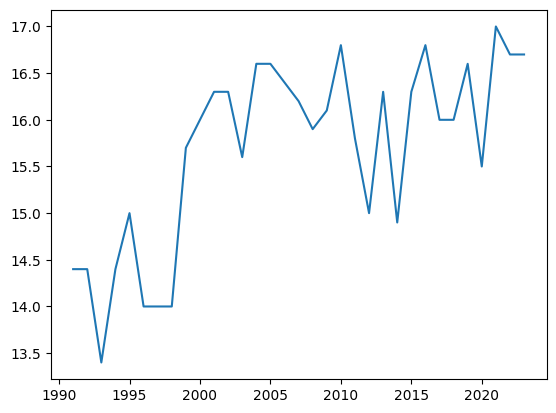

In [105]:
# JAVOBNI SHUYERGA YOZING
x = df['T']
plt.plot(x)
plt.show()

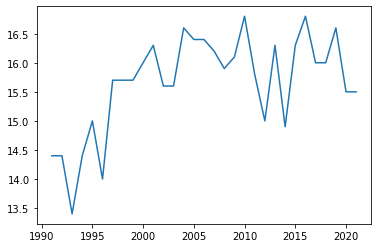

In [ ]:
#@title To'g'ri javob
import matplotlib.pyplot as plt
%matplotlib inline
x=df['T']
plt.plot(x)
plt.show()

### 7.2. Yuqoridagi grafikni hajmini kattalashtiring, chiziq qalingligi, turi, rangi, markerlar turini istalgancha o'zgartiring

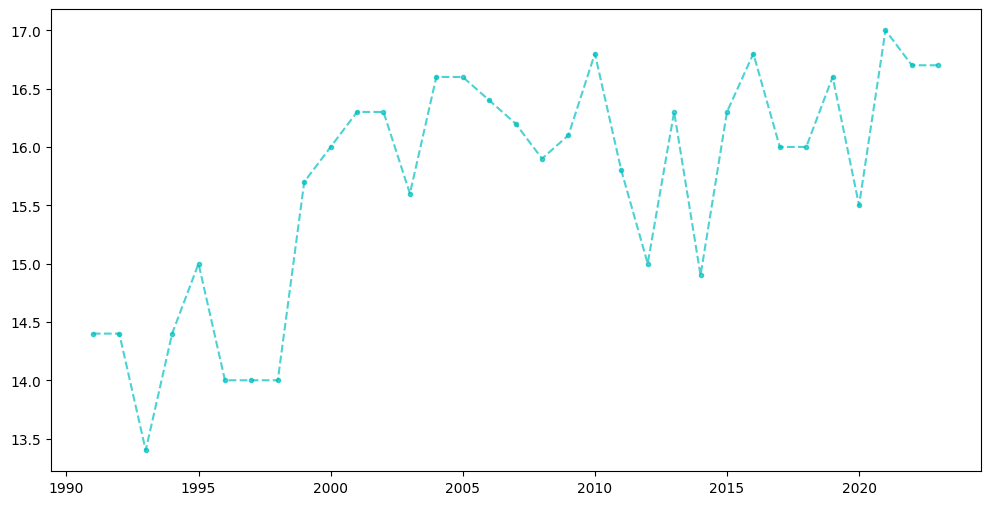

In [112]:
# JAVOBNI SHUYERGA YOZING
plt.figure(figsize=(12,6))
plt.plot(x,
         linewidth=1.5,
         linestyle='--',
         color='c',
         alpha=0.7,
         marker='.')

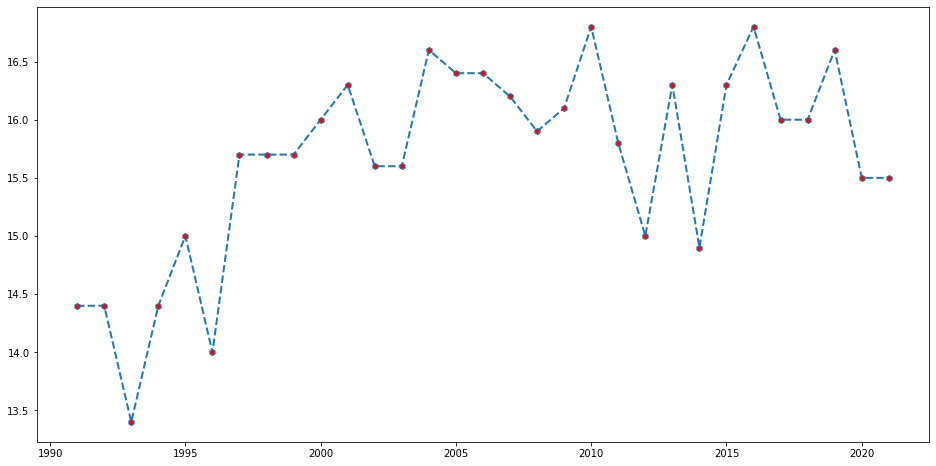

In [ ]:
#@title Javobga misol:
x=df['T']
plt.figure(figsize=(16,8))
plt.plot(x, linewidth=2, linestyle="--", marker='h', markerfacecolor='r')
plt.show()

### 7.3. Yuqoridagi grafikda x va y o'qlarini nomlang, grafikka ham umumiy nom bering

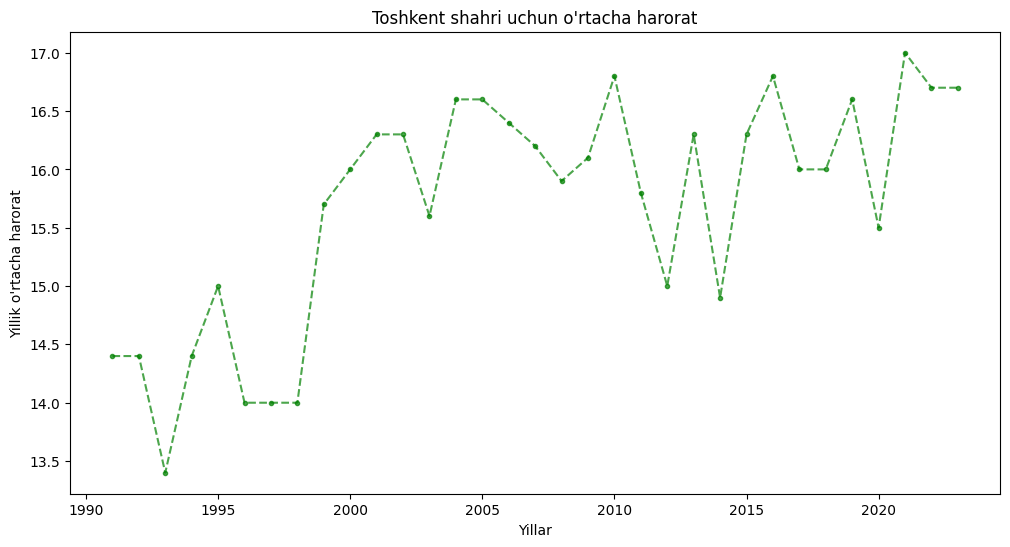

In [116]:
# JAVOBNI SHUYERGA YOZING
plt.figure(figsize=(12,6))
# Grafik nomi:
plt.title("Toshkent shahri uchun o'rtacha harorat")
# x-o'q nomi:
plt.xlabel("Yillar")
# y-o'q nomi:
plt.ylabel("Yillik o'rtacha harorat")

plt.plot(x,
         linewidth=1.5,
         linestyle='--',
         color='g',
         alpha=0.7,
         marker='.')

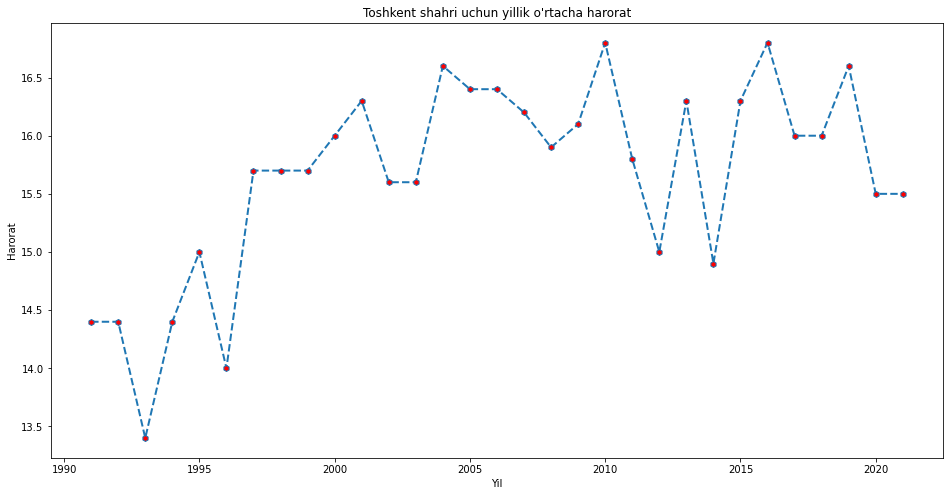

In [ ]:
#@title To'g'ri javob
x=df['T']
plt.figure(figsize=(16,8))
plt.plot(x, linewidth=2, linestyle="--", marker='h', markerfacecolor='r')
plt.title("Toshkent shahri uchun yillik o'rtacha harorat")
plt.xlabel("Yil")
plt.ylabel("Harorat")
plt.show()

## 8-VAZIFA. Toshkent shahri uchun, har bir yilda o'rtacha min va max haroratlarni ko'rsatuvchi grafik chizing. **Grafikni faylga saqlab oling**

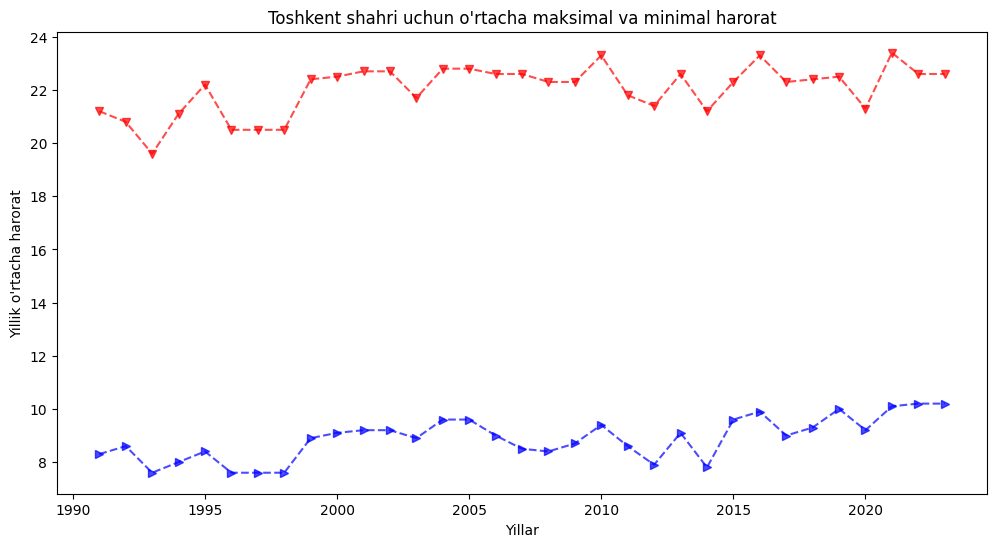

In [120]:
# JAVOBNI SHUYERGA YOZING
x1 = df["TM"]
x2 = df["Tm"]
plt.figure(figsize=(12,6))
# Grafik nomi:
plt.title("Toshkent shahri uchun o'rtacha maksimal va minimal harorat")
# x-o'q nomi:
plt.xlabel("Yillar")
# y-o'q nomi:
plt.ylabel("Yillik o'rtacha harorat")

plt.plot(x1,
         linewidth=1.5,
         linestyle='--',
         color='r',
         alpha=0.7,
         marker='v')

plt.plot(x2,
         linewidth=1.5,
         linestyle='--',
         color='b',
         alpha=0.7,
         marker='>')
plt.savefig('TashMaxMin.png')

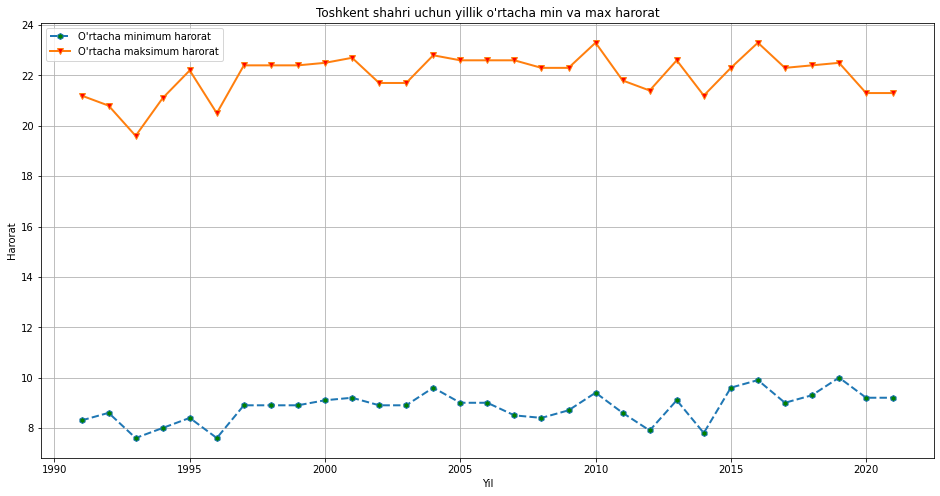

In [ ]:
#@title To'g'ri javob
minT = df['Tm']
maxT = df['TM']
plt.figure(figsize=(16,8))
plt.plot(minT, linewidth=2, linestyle="--", marker='h', markerfacecolor='g', label="O'rtacha minimum harorat")
plt.plot(maxT, linewidth=2, linestyle="-", marker='v', markerfacecolor='r', label="O'rtacha maksimum harorat")
plt.grid()
plt.legend()
plt.title("Toshkent shahri uchun yillik o'rtacha min va max harorat")
plt.xlabel("Yil")
plt.ylabel("Harorat")
plt.savefig('tempMinMax.png')
plt.show()

## 9-VAZIFA. Faylga saqlangan grafikni ochib ko'ring.

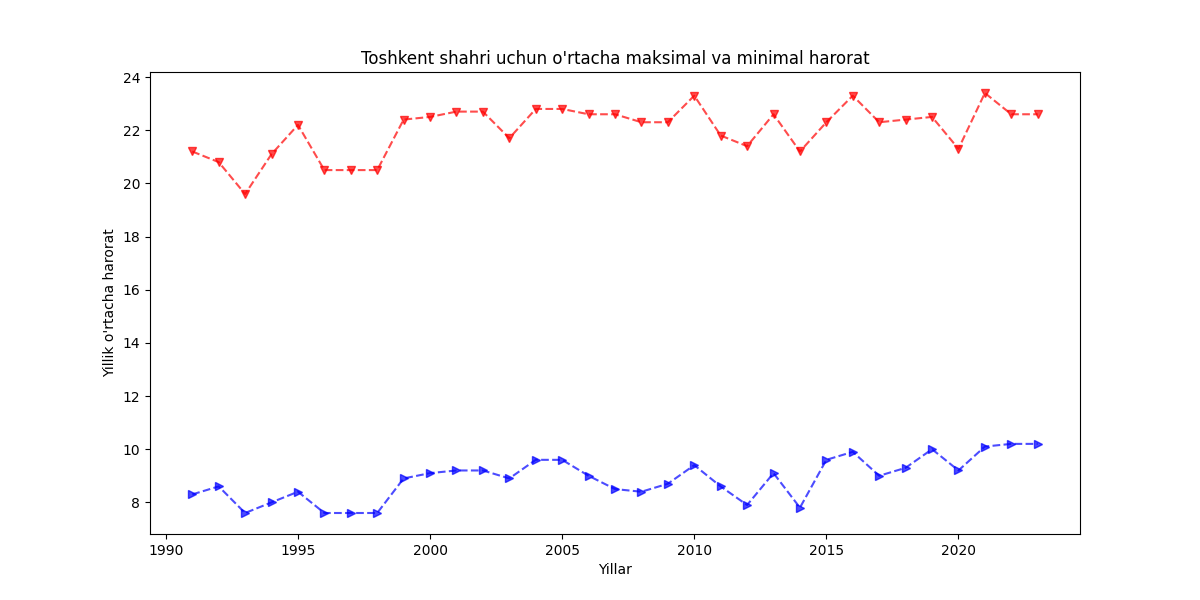

In [121]:
# JAVOBNI SHUYERGA YOZING
from IPython.display import Image
Image('TashMaxMin.png')

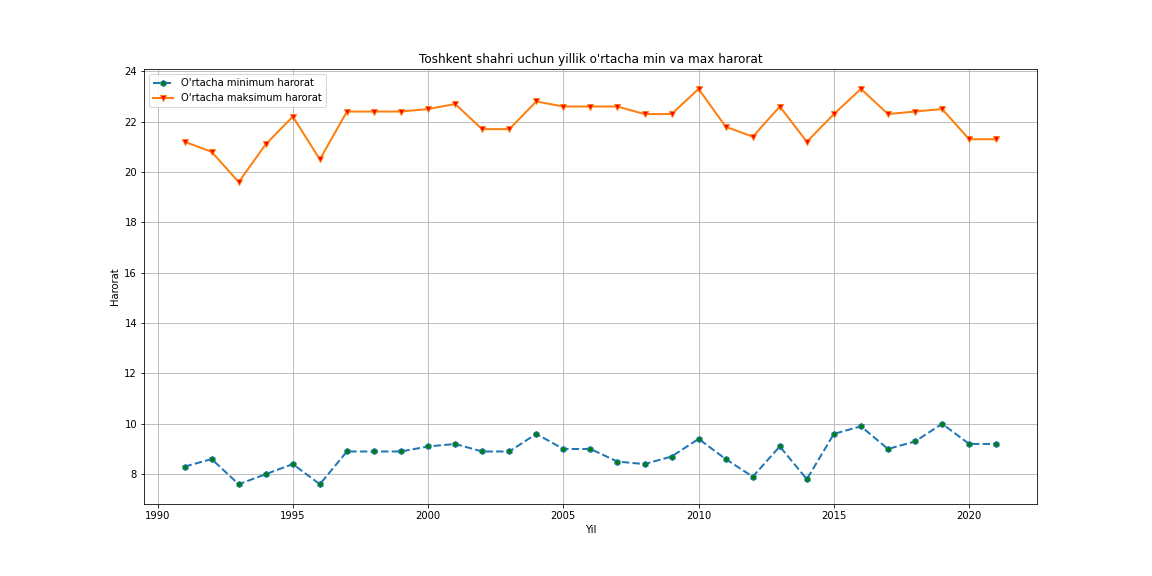

In [ ]:
#@title Javob
from IPython.display import Image
Image('tempMinMax.png')